In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [3]:
Image_Width=80
Image_Height=80
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [4]:
filenames=os.listdir("C:/Users/Vandana/imagedata/train/")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='saree':
        categories.append(1) 
    elif category=='jeans':
        categories.append(0)
    else:
        categories.append(2)
        
        
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})


test_filenames = os.listdir("C:/Users/Vandana/imagedata/test/")
test_categories=[]
for f_name in test_filenames:
    category=f_name.split('.')[0]
    if category=='saree':
        test_categories.append(1) 
    elif category=='jeans':
        test_categories.append(0)
    else:
        test_categories.append(2)
test_df = pd.DataFrame({
    'filename': test_filenames,
    'categories': test_categories
})
nb_samples = test_df.shape[0]

In [5]:
df

,filename,category
0,jeans.008d03d6fe.png,0
1,jeans.0133442e99.png,0
2,jeans.02f903d63b.png,0
3,jeans.0346769917.png,0
4,jeans.03ce1f308a.png,0
...,...,...
797,Trouser.c366c34b8b.png,2
798,Trouser.c3ee0e6444.png,2
799,Trouser.c7b74329bb.png,2
800,Trouser.c9282c672b.png,2


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',
  optimizer='SGD',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 78, 78, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0

In [8]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [9]:
df["category"] = df["category"].replace({0:'jeans',1:'saree', 2:'Trouser'})
test_df["categories"] = test_df["categories"].replace({0:'jeans',1:'saree', 2:'Trouser'})
train_df,validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=15

In [10]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "C:/Users/Vandana/imagedata/train/",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "C:/Users/Vandana/imagedata/train/", 
    x_col='filename',
    y_col='category',
    target_size=Image_Size,
    class_mode='categorical',
    batch_size=batch_size
)
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)
test_generator = test_datagen.flow_from_dataframe(test_df,
                                                 "C:/Users/Vandana/imagedata/test/",x_col='filename',y_col='categories',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)

Found 641 validated image filenames belonging to 3 classes.
Found 161 validated image filenames belonging to 3 classes.
Found 210 validated image filenames belonging to 3 classes.


In [11]:
epochs=10
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/10
42/42 [==============================] - 18s 388ms/step - loss: 1.3630 - accuracy: 0.5662 - val_loss: 1.0974 - val_accuracy: 0.3733
Epoch 2/10
42/42 [==============================] - 14s 342ms/step - loss: 0.9730 - accuracy: 0.6797 - val_loss: 1.3404 - val_accuracy: 0.5267
Epoch 3/10
42/42 [==============================] - 14s 341ms/step - loss: 0.8151 - accuracy: 0.7158 - val_loss: 0.9103 - val_accuracy: 0.5800
Epoch 4/10
42/42 [==============================] - 14s 340ms/step - loss: 0.7570 - accuracy: 0.7170 - val_loss: 1.5255 - val_accuracy: 0.5800
Epoch 5/10
42/42 [==============================] - 14s 342ms/step - loss: 0.6834 - accuracy: 0.7314 - val_loss: 1.6773 - val_accuracy: 0.5400
Epoch 6/10
42/42 [==============================] - 14s 343ms/step - loss: 0.5244 - accuracy: 0.7989 - val_loss: 1.3348 - val_accuracy: 0.6200
Epoch 7/10
42/42 [==============================] - 16s 385ms/step - loss: 0.6343 - accuracy: 0.7761 - val_loss: 2.1550 - val_accuracy: 0.4200

In [12]:
model.save("image_jst.h5")

In [13]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [14]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'saree': 1, 'jeans': 0 , 'Trouser':2 })

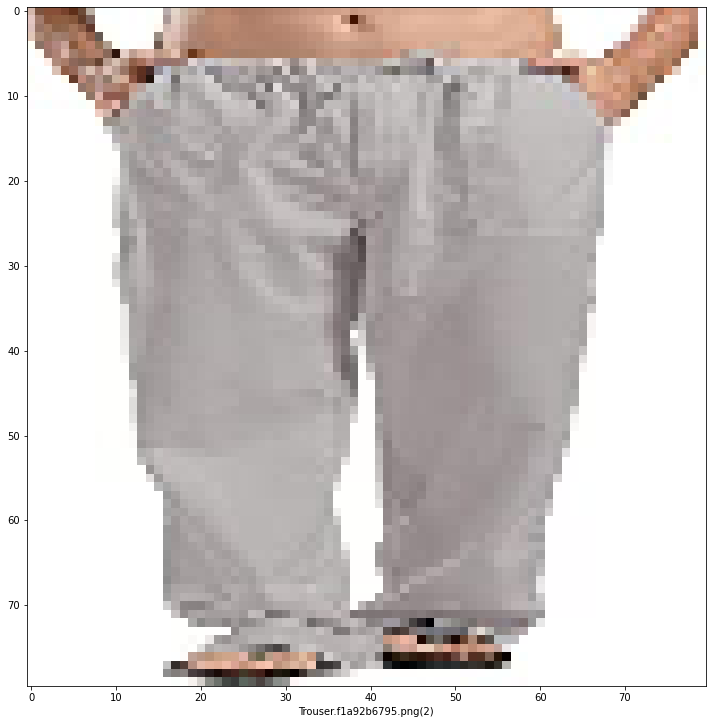

In [18]:
sample_test = test_df.sample(n=4)
sample_test.head()
plt.figure(figsize=(10, 20))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("C:/Users/Vandana/imagedata/test/"+filename, target_size=Image_Size)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()